# M50 Homework 3

## Alex Craig

## Exercise 1.
(Testing for normality): Here we consider the dataset that can be loaded with

```python
df = pd.read˙csv(”https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv”)
```

### Part A
Let $Y$ denote the data from the column earn, which contains peoples earnings from this sample of adults in the US. Using this sample, estimate:

$$
\mathbb{P}(Y > \mu_Y + 2\sigma_Y)
$$

where $\mu_Y$ and $\sigma_Y$ are the mean and standard deviation of the earnings (these will need to be estimated along the way).

### Solution
Denotes our estimations of $\mu_Y$ and $\sigma_Y$ as $\bar{\mu}_Y$ and $\bar{\sigma}_Y$ respectively. Then we have

In [18]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Earnings/data/earnings.csv")

Y = df['earn']

mu_bar = Y.mean()
sigma_bar = Y.std()

probability = (Y > mu_bar + 2*sigma_bar).mean()

print(f"Sample mean: {mu_bar}")
print(f"Sample standard deviation: {sigma_bar}")
print(f"P(Y > mu_bar + 2*sigma_bar): {probability}")

Sample mean: 21147.296255506608
Sample standard deviation: 22531.76512330289
P(Y > mu_bar + 2*sigma_bar): 0.02918502202643172


### Part B
Based on your results from part (a), do you think the distribution of earnings is accurately captured by a Normal random variable?

### Solution
Let us assume $Y \sim N(\bar{\mu}_Y, \bar{\sigma}_Y^2)$, and then compare the empirical CDF of $Y$ to the CDF of $N(\bar{\mu}_Y, \bar{\sigma}_Y^2)$.

In [19]:
import scipy.stats as stats

print(f"Empirical CDF probability: {probability}")

# Analytical solution
print(f"Normal CDF probability: {1 - stats.norm.cdf(mu_bar + 2*sigma_bar, loc = mu_bar, scale = sigma_bar)}")

Empirical CDF probability: 0.02918502202643172
Normal CDF probability: 0.02275013194817921


We can see that the empirical and normal CDFs are very similar, so we can conclude that the distribution of earnings is accurately captured by a Normal random variable.

### Part C
Repeat (a) and (b) with data from the height column. Do you think the variation height data is accurately approximated by a Normal distribution?

### Solution

## Exercise 2.
(Computation with normal variables): Let

$$
Z_1 \sim N(0, 1^2), \quad Z_2 \sim N(1, 4)
$$

be independent.

### Part A
Using the estimates of Normal probabilities in class, compute the following:
1. $\mathbb{P}(Z_1 > 2)$
2. $\mathbb{P}(Z_1 + Z_2 < 6)$
3. $\mathbb{P}(Z_1 - Z_2 > 4)$

### Solution
1. 
$$
\mathbb{P}(Z_1 > 2) = 1 - \mathbb{P}(Z_1 \leq 2) = 1 - \Phi(2) \approx 1 - 0.9772 = 0.0228
$$

2. 
Let $X = Z_1 + Z_2$. Then $E[X] = E[Z_1 + Z_2] = E[Z_1] + E[Z_2] = 0 + 1 = 1$ and $Var(X) = Var(Z_1 + Z_2) = Var(Z_1) + Var(Z_2) = 1 + 4 = 5$. 

Therefore, $X \sim N(1, 5)$. 

Therefore,  $\mathbb{P}(Z_1 + Z_2 < 6) = \mathbb{P}(X < 6) = \mathbb{P}\left(\frac{X - 1}{\sqrt{5}} < \frac{6 - 1}{\sqrt{5}}\right) = \mathbb{P}(Z_1 < 2.236) = \Phi(2.236) \approx 0.9873$

3. 
Let $Y = Z_1 - Z_2$. Then $E[Y] = E[Z_1 - Z_2] = E[Z_1] - E[Z_2] = 0 - 1 = -1$ and $Var(Y) = Var(Z_1 - Z_2) = Var(Z_1) + Var(Z_2) = 1 + 4 = 5$.

Therefore, $Y \sim N(-1, 5)$.

Therefore, $\mathbb{P}(Z_1 - Z_2 > 4) = \mathbb{P}(Y > 4) = \mathbb{P}\left(\frac{Y + 1}{\sqrt{5}} > \frac{4 + 1}{\sqrt{5}}\right) = \mathbb{P}(Z_1 > 3.162) = 1 - \Phi(2.236) \approx 1 - 0.9873 = 0.0127$

### Part B
Check your answers with monte carlo simulations in python.

### Solution

In [26]:
import numpy as np

# Number of samples
N = 10000000

# Simulate samples from Z_1 and Z_2
z1_samples = np.random.normal(0, 1, N)
z2_samples = np.random.normal(1, 2, N)

# Compute the probabilities:

# P(Z_1 > 2)
prob_z1_gt_2 = np.mean(z1_samples > 2)

# P(Z_1 + Z_2 < 6)
prob_z1_plus_z2_lt_6 = np.mean(z1_samples + z2_samples < 6)

# P(Z_1 - Z_2 > 4)
prob_z1_minus_z2_gt_4 = np.mean(z1_samples - z2_samples > 4)

print(f"P(Z_1 > 2) ≈ {prob_z1_gt_2:.4f}")
print(f"P(Z_1 + Z_2 < 6) ≈ {prob_z1_plus_z2_lt_6:.4f}")
print(f"P(Z_1 - Z_2 > 4) ≈ {prob_z1_minus_z2_gt_4:.4f}")

P(Z_1 > 2) ≈ 0.0227
P(Z_1 + Z_2 < 6) ≈ 0.9873
P(Z_1 - Z_2 > 4) ≈ 0.0126


### Exercise 3.
(Central limit Theorem): Suppose

$$
U_i \sim \text{Uniform}(u_0 - L, u_0 + L), \quad i = 1, \dots, N
$$

Note that by symmetry, $E[U_i] = u_0$.

### Part A
Using simulations, confirm that

$$
var(U_i) = \frac{L^2}{3}
$$

In particular, make a plot of $var(U_i)$ as a function of $L$.

### Solution

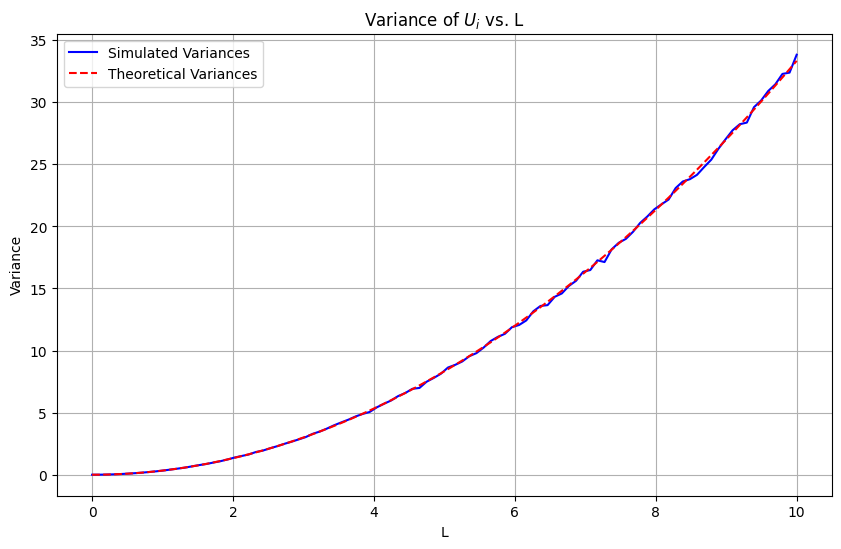

In [30]:
import matplotlib.pyplot as plt

# Define u_0
u_0 = 0

# Define a range of L values
L_values = np.linspace(0, 10, 100)

# Store the variances
variances = []

# Simulate Ui for each L and compute the variance
for L in L_values:
    U_i = np.random.uniform(u_0 - L, u_0 + L, size=10000)
    variances.append(np.var(U_i))

# Theoretical variances
theoretical_variances = L_values**2 / 3

# Plotting
plt.figure(figsize=(10,6))
plt.plot(L_values, variances, label='Simulated Variances', color='blue')
plt.plot(L_values, theoretical_variances, label='Theoretical Variances', linestyle='--', color='red')
plt.xlabel('L')
plt.ylabel('Variance')
plt.title('Variance of $U_i$ vs. L')
plt.legend()
plt.grid(True)
plt.show()

### Part B
Now consider the sum

$$
S_N = \sum_{i=1}^N U_i
$$

Use CLT to approximate $\mathbb{P}(S_N > u_0 + \frac{L}{4})$ in terms of the cumulative distribution of a Normal random variable.

### Solution